## Normalization & Dataset Split

data infor
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
A    10 non-null int64
B    10 non-null int64
C    10 non-null int64
D    10 non-null int64
dtypes: int64(4)
memory usage: 448.0 bytes
None
data head
   A   B    C  D
0  1  10  100  2
1  2  20  200  2
2  3  30  300  2
3  4  40  400  2
4  5  50  500  2


/home/shseo/anaconda3/envs/shseo_venv_tf2/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


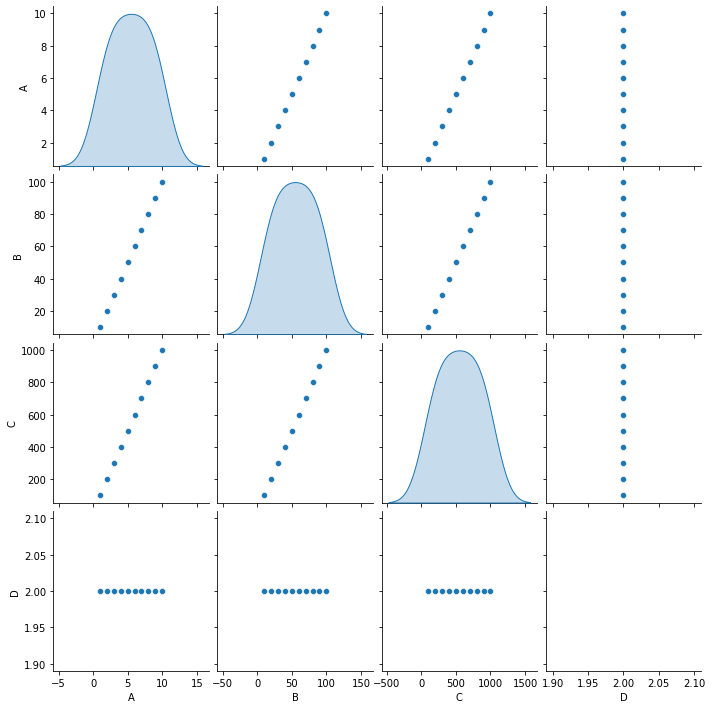

min max : 
          A         B         C
0  0.000000  0.000000  0.000000
1  0.111111  0.111111  0.111111
2  0.222222  0.222222  0.222222
3  0.333333  0.333333  0.333333
4  0.444444  0.444444  0.444444
5  0.555556  0.555556  0.555556
6  0.666667  0.666667  0.666667
7  0.777778  0.777778  0.777778
8  0.888889  0.888889  0.888889
9  1.000000  1.000000  1.000000
standard : 
          A         B         C
0 -1.486301 -1.486301 -1.486301
1 -1.156012 -1.156012 -1.156012
2 -0.825723 -0.825723 -0.825723
3 -0.495434 -0.495434 -0.495434
4 -0.165145 -0.165145 -0.165145
5  0.165145  0.165145  0.165145
6  0.495434  0.495434  0.495434
7  0.825723  0.825723  0.825723
8  1.156012  1.156012  1.156012
9  1.486301  1.486301  1.486301
x train
          A         B         C
0 -1.486301 -1.486301 -1.486301
1 -1.156012 -1.156012 -1.156012
2 -0.825723 -0.825723 -0.825723
3 -0.495434 -0.495434 -0.495434
4 -0.165145 -0.165145 -0.165145
5  0.165145  0.165145  0.165145
label train
0    2
1    2
2    2
3    2
4

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 데이터 읽어오기.## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/test.csv")
print("data infor")
print(raw_df.info())
print("data head")
print(raw_df.head())
dataset=raw_df.copy()

## 데이터 분포도 확인하기.
sns.pairplot(dataset[["A","B","C","D"]], diag_kind="kde")
plt.show()

## 데이터의 min , max, mean, std 값 구하기.
dataset_stats = dataset.describe()
dataset_stats.pop("D")
dataset_stats = dataset_stats.transpose()

train_labels = dataset.pop("D")

## data normalization
def min_max_norm(x):
    return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

def standard_norm(x):
    return (x - dataset_stats['mean']) / dataset_stats['std']

min_max_norm_train_data = min_max_norm(dataset)
standard_norm_train_data = standard_norm(dataset)

print("min max : ")
print(min_max_norm_train_data)
print("standard : ")
print(standard_norm_train_data)

#### data 분리
X_train1, X_test, Y_train1, Y_test = \
  train_test_split(standard_norm_train_data, train_labels, test_size=0.2,shuffle=False)

X_train, X_val, Y_train, Y_val = \
  train_test_split(X_train1, Y_train1, test_size=0.2,shuffle=False)

print("x train")
print(X_train)
print("label train")
print(Y_train)

print("x val")
print(X_val)
print("label val")
print(Y_val)

print("x test")
print(X_test)
print("label test")
print(Y_test)

## house price of area (normalization + data division )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
house age                              414 non-null float64
distance to the nearest MRT station    414 non-null float64
number of convenience stores           414 non-null int64
latitude                               414 non-null float64
longitude                              414 non-null float64
house price of unit area               414 non-null float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB
None
   house age  distance to the nearest MRT station  \
0       32.0                             84.87882   
1       19.5                            306.59470   
2       13.3                            561.98450   
3       13.3                            561.98450   
4        5.0                            390.56840   

   number of convenience stores  latitude  longitude  house price of unit area  
0                            10  24.98298  121.54024                      37.9  
1

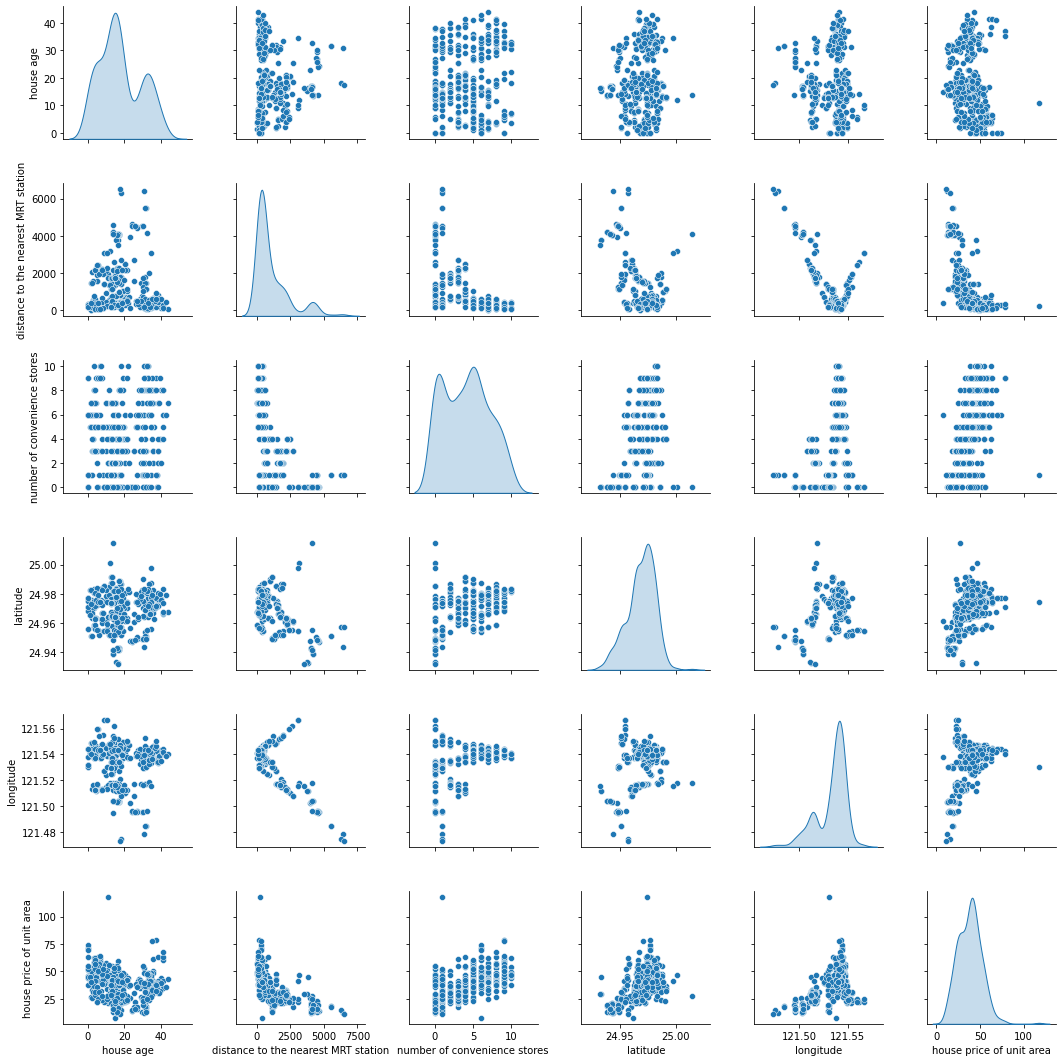

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 5)]               0         
_________________________________________________________________
dense (Dense)                (None, 50)                300       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 36,001
Trainable params: 36,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5000
1/1 [==============================] - 1s 632ms/step - loss: 1663.1904 - root_mean_squared_error: 40.7822 - va

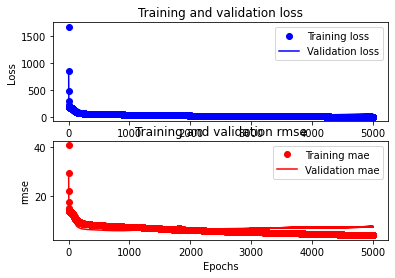

In [2]:
from sklearn.model_selection import train_test_split

import seaborn as sns
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## 데이터 읽어오기.## 데이터 읽어오기.
raw_df = pd.read_csv("../dataset/house_price_of_unit_area.csv")
print(raw_df.info())
print(raw_df.head())

## data copy
dataset=raw_df.copy()
## data label 값 가져오기
label_data=dataset.pop("house price of unit area")

## data 분포도 확인
sns.pairplot(raw_df[["house age", "distance to the nearest MRT station", "number of convenience stores", "latitude", "longitude","house price of unit area"]], diag_kind="kde")
plt.show()

## 데이터 train/val/test 분리
X_train1, X_test, Y_train1, Y_test = train_test_split(dataset, label_data, test_size=0.3, shuffle=True)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1, test_size=0.2, shuffle=True)

# train 데이터에서 normalization하기 위한 값들 추출
## train 입력 데이터 열 별로 min, max, mean, std 구하기.
dataset_stats = X_train.describe()
dataset_stats = dataset_stats.transpose()

## data normalization
def min_max_norm(x):
    return (x - dataset_stats['min']) / (dataset_stats['max'] - dataset_stats['min'])

def standard_norm(x):
    return (x - dataset_stats['mean']) / dataset_stats['std']

## train data에서 추출한 값들로 train/val/test 데이터 normalization
normed_train_data = 10*standard_norm(X_train)
normed_val_data = 10*standard_norm(X_valid)
normed_test_data = 10*standard_norm(X_test)

# 모델의 설정
input_Layer = tf.keras.layers.Input(shape=(5,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_Layer)
x= tf.keras.layers.Dense(100, activation='sigmoid')(x)
x= tf.keras.layers.Dense(300, activation='sigmoid')(x)
Out_Layer= tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_Layer], outputs=[Out_Layer])
model.summary()

loss=tf.keras.losses.mean_squared_error
optimizer=tf.keras.optimizers.SGD(learning_rate=0.002)
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss=loss,
              optimizer=optimizer,
              metrics=[metrics])

result=model.fit(normed_train_data, Y_train, epochs=5000, batch_size=1000, validation_data=(normed_val_data,Y_valid))
## model fit은 histoy를 반환한다. 훈련중의 발생하는 모든 정보를 담고 있는 딕셔너리.
## histoy는 딕셔너리이므로 keys()를 통해 출력의 key(카테고리)를 알 수 있다.
print(result.history.keys())

### history에서 loss와 val_loss의 key를 가지는 값들만 추출
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error 와 val_mean_absolute_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error , val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'ro', label='Training mae')
plt.plot(epochs, val_rmse, 'r', label='Validation mae')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(normed_test_data, Y_test)[1]))

## 10샘플 데이터를 넣어서 예측값을 출력하여 정답값과 비교
for i in range(10):
    input_test_data=np.expand_dims(normed_test_data.values[i][:], axis=0)
    print("true : ", Y_test.values[i], "prediction: ", model.predict(input_test_data))
plt.show()

